In [1]:
from datetime import datetime, timedelta
import pandas as pd
import requests
import matplotlib.pyplot as plt

from FinMind.data import DataLoader

# stock date

## Arrange stock info

In [2]:
dl = DataLoader()
stock_no = '2331'
start_date = '1994-09-24'

## taiwan_stock_daily

In [3]:
stock_data = dl.taiwan_stock_daily(stock_no, start_date=start_date)

2024-07-09 19:21:20.589 | INFO     | FinMind.data.finmind_api:get_data:125 - download Dataset.TaiwanStockPrice, data_id: 2331


In [7]:
query = stock_data['date']>'2024-06-01'
month_df = stock_data[query]
month_df.tail()

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
3708,2024-07-01,3131,1206000,1712275000,1350.0,1450.0,1350.0,1415.0,60.0,1142
3709,2024-07-02,3131,684000,963905000,1415.0,1445.0,1385.0,1390.0,-25.0,657
3710,2024-07-03,3131,376000,527005000,1435.0,1440.0,1370.0,1375.0,-15.0,366
3711,2024-07-04,3131,919000,1324220000,1410.0,1500.0,1390.0,1425.0,50.0,856
3712,2024-07-05,3131,788000,1195895000,1415.0,1565.0,1415.0,1565.0,140.0,736


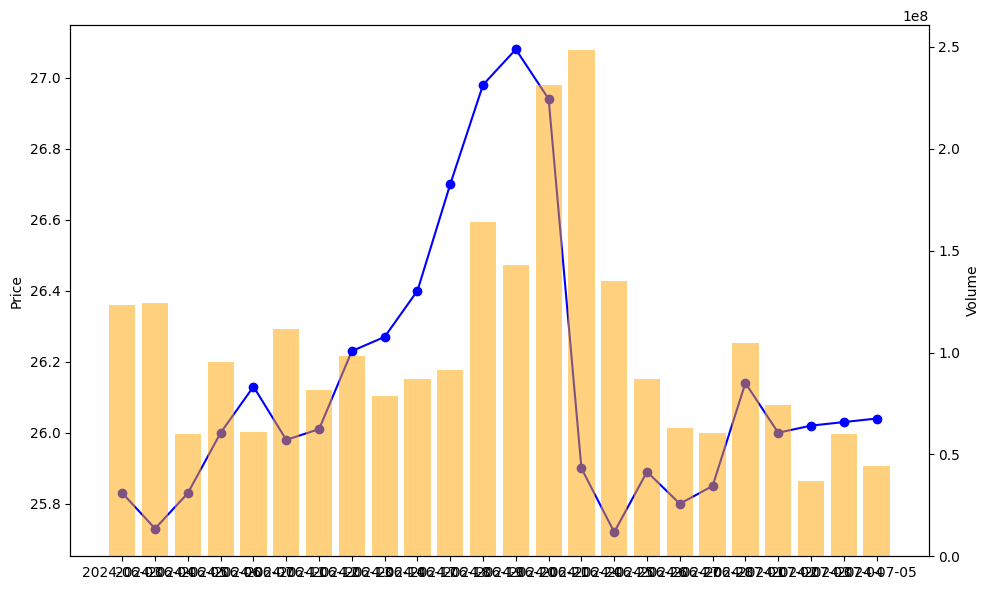

In [18]:
query = stock_data['date']>'2024-06-01'
stock_data = stock_data[query]
fig, ax1 = plt.subplots(figsize=(10,6))
# 折線圖(價格變化)
ax1.plot(stock_data['date'], stock_data['close'], marker='o', linestyle='-', label='Price', color='b')
ax1.set_ylabel('Price')

ax2 = ax1.twinx()
ax2.bar(stock_data['date'], stock_data['Trading_Volume'], label='Volume', color='orange', alpha=0.5)
ax2.set_ylabel('Volume')

fig.tight_layout()
plt.show()

## stock investors trade data

In [12]:
invest_df = dl.taiwan_stock_institutional_investors(
    stock_id=stock_no,
    start_date=start_date    
)
query = invest_df['buy']>0
invest_df = invest_df[query]

2024-07-05 10:36:01.174 | INFO     | FinMind.data.finmind_api:get_data:125 - download Dataset.TaiwanStockInstitutionalInvestorsBuySell, data_id: 00919


## stock daily news

In [23]:
url = 'https://api.finmindtrade.com/api/v4/data'
today = datetime.now()
yesterday = today - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')
parameter = {
    'dataset': 'TaiwanStockNews',
    'data_id':stock_no,
    'start_date': yesterday,
}

stock_news = requests.get(url, params=parameter)
stock_news = stock_news.json()
stock_news = pd.DataFrame(stock_news['data'])
stock_news

{'msg': 'success',
 'status': 200,
 'data': [{'date': '2024-07-04 07:36:31',
   'stock_id': '00919',
   'link': 'https://news.google.com/rss/articles/CBMiQ2h0dHBzOi8vd2VhbHRoLmJ1c2luZXNzd2Vla2x5LmNvbS50dy9HQXJ0aWNsZS5hc3B4P2lkPUFSVEwwMDMwMTQxNjPSAQA?oc=5',
   'source': '商周財富網',
   'title': '00919貼息，該加入定期定額壓低成本嗎？ - 商周財富網'}]}

## CnnFearGreedIndex 恐懼與貪婪指數

In [27]:
url = 'https://api.finmindtrade.com/api/v4/data'
today = datetime.now()
month_before = today - timedelta(days=30)
month_before = month_before.strftime('%Y-%m-%d')
parameter = {
    'dataset': 'CnnFearGreedIndex',
    'start_date': month_before,
}
res = requests.get(url, parameter)
res = res.json()
res = pd.DataFrame(res['data'])
res

,date,fear_greed,fear_greed_emotion
0,2024-06-05,45,neutral
1,2024-06-06,44,fear
2,2024-06-07,45,neutral
3,2024-06-10,43,fear
4,2024-06-11,43,fear
5,2024-06-12,45,neutral
6,2024-06-13,40,fear
7,2024-06-14,38,fear
8,2024-06-17,41,fear
9,2024-06-18,44,fear


# Export to excel

In [4]:
stock_data.to_excel(f"stk-{datetime.now().date()}.xlsx", sheet_name=stock_no)